# Import Libraries

In [1]:
from os import path

import pandas as pd
import numpy as np

# min-max scaler to make sure all features are scaled between 0 and 1 for chi-square test
from sklearn.preprocessing import MinMaxScaler

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# import Recursive Feature Elimination, Chi-square feature selection, and SelectKBest
from sklearn.feature_selection import chi2, SelectKBest, RFE

import matplotlib.pyplot as plt
import seaborn as sns

# Load One-HotEncoded and Preprocessed Data

In [2]:
df_ohe = pd.read_csv(path.join("..", "data", "heart_disease_ohe.csv"))
df_ohe.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,63,0.0,1.0,1.0,0.0,0.0,0.0,145,233,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,67,0.0,1.0,0.0,0.0,0.0,1.0,160,286,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,67,0.0,1.0,0.0,0.0,0.0,1.0,120,229,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,37,0.0,1.0,0.0,0.0,1.0,0.0,130,250,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [3]:
df_standard_scaled = pd.read_csv(path.join("..", "data", "heart_disease_preprocessed.csv"))
df_standard_scaled.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,0.936181,0.0,1.0,1.0,0.0,0.0,0.0,0.750380,-0.276443,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,1.596266,0.744555,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.378929,0.0,1.0,0.0,0.0,0.0,1.0,-0.659431,-0.353500,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.941680,0.0,1.0,0.0,0.0,1.0,0.0,-0.095506,0.051047,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.498933,1.0,0.0,0.0,1.0,0.0,0.0,-0.095506,-0.835103,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Scaling Numerical Features

In [4]:
min_max_scaler = MinMaxScaler()
X_ohe = df_ohe.drop(columns=["num"])
y_ohe = df_ohe["num"]
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_ohe),columns=X_ohe.columns)
df_min_max_scaled["num"] = y_ohe
df_min_max_scaled.head()

,age,sex_female,sex_male,cp_typical_angina,cp_atypical_angina,cp_non_anginal_pain,cp_asymptomatic,trestbps,chol,fbs_<120mg/dl,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,0.708333,0.0,1.0,1.0,0.0,0.0,0.0,0.481132,0.244292,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.791667,0.0,1.0,0.0,0.0,0.0,1.0,0.622642,0.365297,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,0.791667,0.0,1.0,0.0,0.0,0.0,1.0,0.245283,0.235160,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.339623,0.283105,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.250000,1.0,0.0,0.0,1.0,0.0,0.0,0.339623,0.178082,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Feature Importance

In [5]:
X_standard_scaled = df_standard_scaled.drop("num", axis=1)
y = df_standard_scaled["num"]

X_min_max_scaled = df_min_max_scaled.drop("num", axis=1)

In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_standard_scaled, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


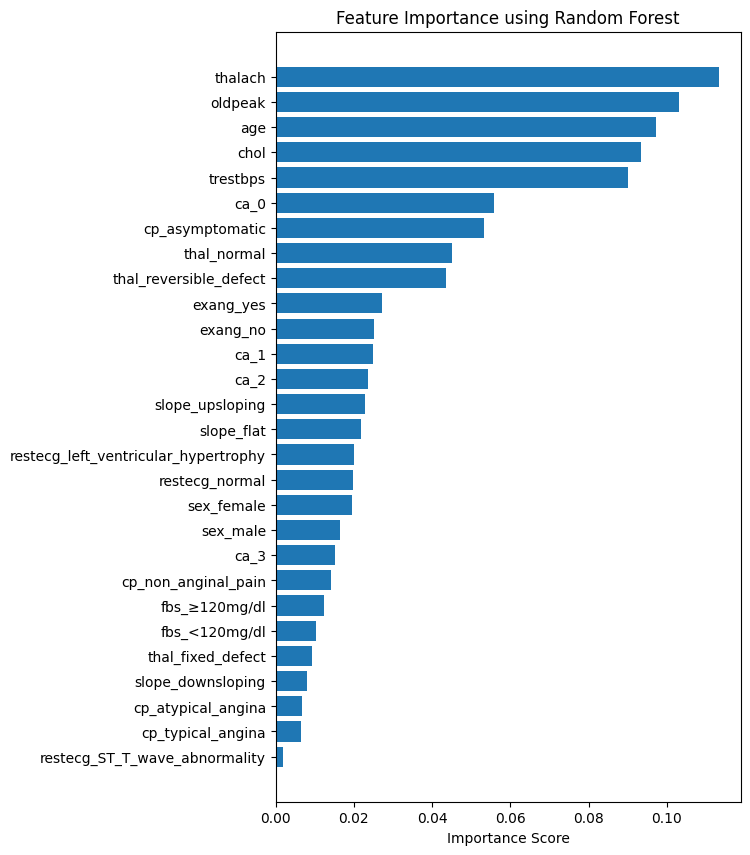

In [7]:
plt.figure(figsize=(6, 10))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_standard_scaled.columns[i] for i in indices]
plt.title("Feature Importance using Random Forest")
plt.barh(range(X_standard_scaled.shape[1]), importances[indices])
plt.yticks(range(X_standard_scaled.shape[1]), names)
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

# Apply Recursive Feature Elimination (RFE)

In [8]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_standard_scaled, y)

,estimator,RandomForestC...ndom_state=42)
,n_features_to_select,10
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


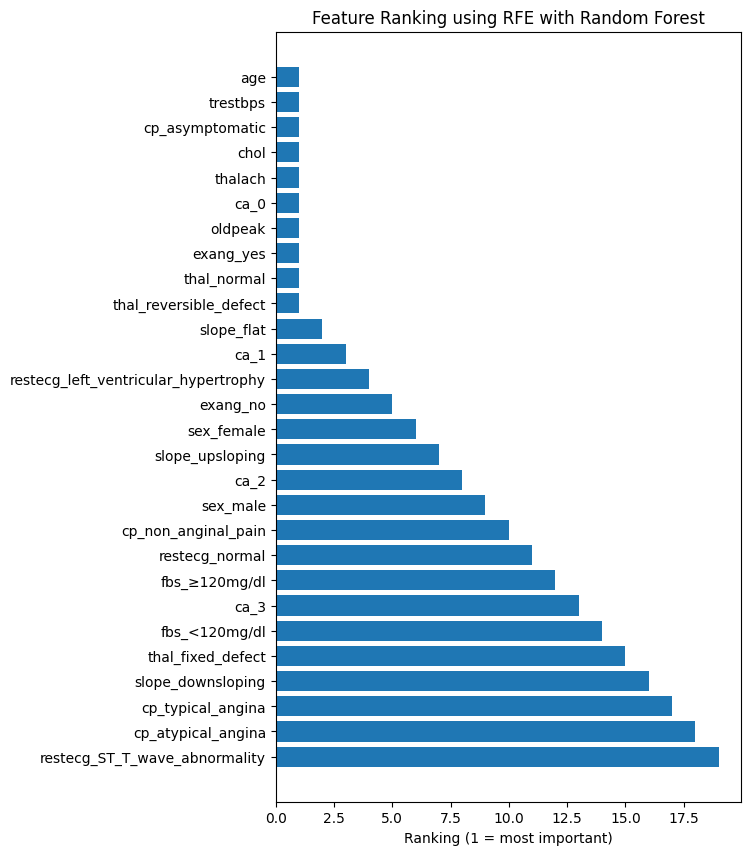

In [9]:
rfe_indices = np.argsort(rfe.ranking_)
rfe_names = [X_standard_scaled.columns[i] for i in rfe_indices]
plt.figure(figsize=(6, 10))
plt.title("Feature Ranking using RFE with Random Forest")
plt.barh(range(X_standard_scaled.shape[1]), rfe.ranking_[rfe_indices], align="center")
plt.yticks(range(X_standard_scaled.shape[1]), rfe_names)
plt.xlabel("Ranking (1 = most important)")
plt.gca().invert_yaxis()
plt.show()

# Apply Chi-Square Test

In [10]:
# Use Chi-square test ti check feature significance
chi2_selector = SelectKBest(chi2, k="all")
chi2_selector.fit(X_min_max_scaled, y)

,score_func,<function chi...0017356AA7CE0>
,k,'all'


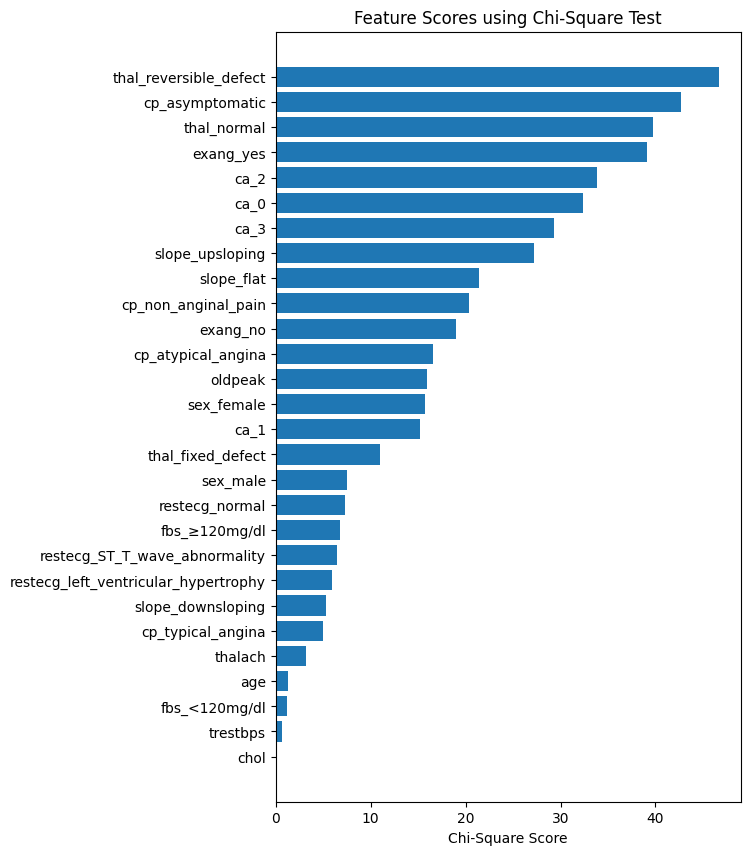

In [11]:
chi2_scores = chi2_selector.scores_
chi2_indices = np.argsort(chi2_scores)[::-1]
chi2_names = [X_min_max_scaled.columns[i] for i in chi2_indices]
plt.figure(figsize=(6, 10))
plt.title("Feature Scores using Chi-Square Test")
plt.barh(range(X_min_max_scaled.shape[1]), chi2_scores[chi2_indices])
plt.yticks(range(X_min_max_scaled.shape[1]), chi2_names)
plt.xlabel("Chi-Square Score")
plt.gca().invert_yaxis()
plt.show()

# Select the most relevant features

In [12]:
# get intersection of top 10 features from three methods
top_importance_features = set(names[:10])
rfe_features = set(rfe_names[:10])
top_chi2_features = set(chi2_names[:10])

common_features = top_importance_features.intersection(rfe_features).intersection(top_chi2_features)
print("Common top features from all three methods:", common_features)

Common top features from all three methods: {'thal_normal', 'thal_reversible_defect', 'exang_yes', 'cp_asymptomatic', 'ca_0'}


In [13]:
top_features_without_intersection = top_importance_features.union(rfe_features).union(top_chi2_features) - common_features

# create a dataframe to display the top features without the common with frequency of occurrence and their scores
top_features_without_intersection_df = pd.DataFrame(list(top_features_without_intersection), columns=["Feature"])
top_features_without_intersection_df["Frequency"] = top_features_without_intersection_df["Feature"].apply(
    lambda x: (x in top_importance_features) + (x in rfe_features) + (x in top_chi2_features)
)
# calculate a combined score for each feature based on its importance, ranking, and chi2 score
top_features_without_intersection_df["Score"] = top_features_without_intersection_df["Feature"].apply(
    lambda x: (importances[X_standard_scaled.columns.get_loc(x)] if x in X_standard_scaled.columns else 0) +
              (1 / rfe.ranking_[X_standard_scaled.columns.get_loc(x)] if x in X_standard_scaled.columns else 0) +
              (chi2_scores[X_min_max_scaled.columns.get_loc(x)] if x in X_min_max_scaled.columns else 0)
)

top_features_without_intersection_df = top_features_without_intersection_df.sort_values(by=["Frequency", "Score"], ascending=False).reset_index(drop=True)


top_features_without_intersection_df

,Feature,Frequency,Score
0,oldpeak,2,16.991067
1,thalach,2,4.307971
2,age,2,2.341725
3,trestbps,2,1.727859
4,chol,2,1.271017
5,ca_2,1,34.014000
6,ca_3,1,29.355891
7,slope_upsloping,1,27.346091
8,slope_flat,1,21.936025
9,cp_non_anginal_pain,1,20.518383


Based on the results from top features that is not common in three methods, we will select the following features for our model based on their frequency, importance, score, and medical relevance

selected_features:
cp_asymptomatic,
thal_reversible_defect,
exang_yes,
ca_0,
thal_normal,
oldpeak,
thalach,
age,
trestbps,
chol,
ca_2,
ca_3,
slope_upsloping,
slope_flat

In [14]:
selected_features = [
  'age', 'cp_asymptomatic',
  'trestbps', "chol", "thalach",
  "exang_yes", 'oldpeak',
  'slope_upsloping', 'slope_flat',
  'ca_0', 'ca_2', 'ca_3',
  "thal_normal", "thal_reversible_defect"
]

df_selected = X_standard_scaled[selected_features].copy()
df_selected["num"] = y

df_selected.to_csv(path.join("..", "data", "heart_disease_selected_features.csv"), index=False)
